In [ ]:
import torch 
import torch.nn as nn
import matplotlib.pylab as plt
import numpy as np

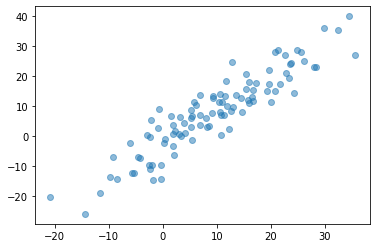

In [ ]:
# dummy data point geneartion 
X = torch.randn(100, 1) * 10 + 10 # Training X distribution
y = X + torch.randn(100, 1) * 5 # Y label with STDev
plt.scatter(X, y, alpha=0.5) 

In [ ]:
# Linear Model class definition
class LR_Model(nn.Module): 
  def __init__(self, inputDim, outputDim):
    super(LR_Model, self).__init__()    # super().__init()__,부모클래스 초기화가능,
    #https://velog.io/@gwkoo/%ED%81%B4%EB%9E%98%EC%8A%A4-%EC%83%81%EC%86%8D-%EB%B0%8F-super-%ED%95%A8%EC%88%98%EC%9D%98-%EC%97%AD%ED%95%A0
    self.linear = nn.Linear(inputDim, outputDim)
  
  def forward(self, x):
    y_pred = self.linear(x)
    return y_pred

In [ ]:
# listing model parameter W, b
torch.manual_seed(1)
model = LR_Model(1, 1)  # takes variable X, y, model instance
print(list(model.parameters()))

[Parameter containing:
tensor([[0.5153]], requires_grad=True), Parameter containing:
tensor([-0.4414], requires_grad=True)]


In [ ]:
""""
# preliminary test
x = torch.tensor([[1.0], [2.0], [3.0]])
print(model.forward(x))
"""

'"\n# preliminary test\nx = torch.tensor([[1.0], [2.0], [3.0]])\nprint(model.forward(x))\n'

In [ ]:
# function to get w (slope), b (bias)
[w, b] = model.parameters()
#print(w[0][0].item(), b[0].item())
def get_params():
  return (w[0][0].item(), b[0].item())

In [ ]:
# Linear fit data visualization/plotting
def plot_LRfit():
  w1, b1 = get_params()
  y_fit = w1*X + b1

  plt.clf()
  plt.plot(X, y, 'go', label='True/lable data', alpha=0.5)
  plt.plot(X, y_fit, '--', label='Predictions', alpha=0.5)
  plt.legend(loc='best')
  plt.show()

#plot_LRfit()

# Gradient Descent

In [ ]:
learningRate = 0.001
epochs = 100 #lose가 지속적으로 감소-> epoch 늘리기, 이때 learning rate 늘리기도

# built-in loss function 
criterion = nn.MSELoss
optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)

In [ ]:
## training 
losses = [] # list

for epoch in range(epochs):
  y_pred1 = model.forward(X)
  loss = criterion()(y_pred1, y) 
  print('epoch {}, loss {}'.format(epoch, loss.item()))

  losses.append(loss)
  #loss계산하는 template 임! 복붙해ㅋㅋㅋㅋ
  optimizer.zero_grad() #grad 초기화해주기
  loss.backward() # compute gradients wrt parameters w, b
  optimizer.step() # update params using the gradient

epoch 0, loss 78.25199890136719
epoch 1, loss 43.91136169433594
epoch 2, loss 32.762413024902344
epoch 3, loss 29.141462326049805
epoch 4, loss 27.964109420776367
epoch 5, loss 27.579938888549805
epoch 6, loss 27.453258514404297
epoch 7, loss 27.41014862060547
epoch 8, loss 27.394176483154297
epoch 9, loss 27.387014389038086
epoch 10, loss 27.382722854614258
epoch 11, loss 27.379362106323242
epoch 12, loss 27.37630844116211
epoch 13, loss 27.373361587524414
epoch 14, loss 27.37044906616211
epoch 15, loss 27.36756134033203
epoch 16, loss 27.36467742919922
epoch 17, loss 27.361801147460938
epoch 18, loss 27.358938217163086
epoch 19, loss 27.3560791015625
epoch 20, loss 27.353221893310547
epoch 21, loss 27.350379943847656
epoch 22, loss 27.3475399017334
epoch 23, loss 27.344703674316406
epoch 24, loss 27.341876983642578
epoch 25, loss 27.339061737060547
epoch 26, loss 27.33625030517578
epoch 27, loss 27.33344078063965
epoch 28, loss 27.330642700195312
epoch 29, loss 27.32784652709961
epoc

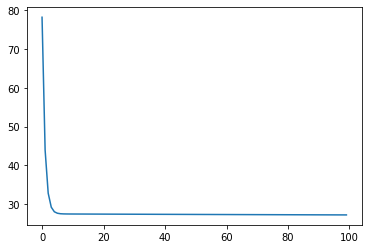

In [ ]:
plt.plot(range(epochs), losses)

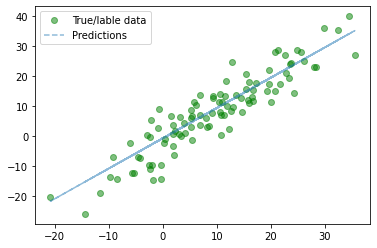

In [ ]:
plot_LRfit()